<h2 style='color:blue'>Small Image Classification Using Simple Aritifical Neural Network: GPU Benchmarking</h2>

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
# Version Information
# tensorflow 2.2.0 , Cudnn7.6.5 and Cuda 10.1 , python 3.8

**This command shows list of physical devices available for tensorflow. You can see GPU listed here. If you have NVIDIA GPU you need to install CUDA toolkit and cuDNN as per instruction on this webpage. Without proper installation you will not see GPU in list of devices**

https://shawnhymel.com/1961/how-to-install-tensorflow-with-gpu-support-on-windows/

In [5]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [6]:
tf.__version__

'2.2.0'

In [7]:
tf.test.is_built_with_cuda()

True

<h4 style="color:purple">Load the dataset</h4>

Our dataset contains 60000 small training images that belongs to one of the below 10 classes

<img src="small_images.jpg" />

In [8]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

<h4 style="color:purple">Data Visualization</h4>

In [11]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

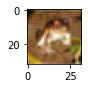

In [12]:
plot_sample(0)

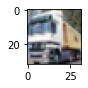

In [13]:
plot_sample(1)

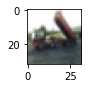

In [14]:
plot_sample(2)

In [15]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

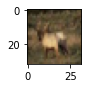

In [16]:
plot_sample(3)

In [17]:
classes[y_train[3][0]]

'deer'

In [18]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [19]:
y_test.shape

(10000, 1)

In [20]:
X_train.shape

(50000, 32, 32, 3)

<h4 style="color:purple">Preprocessing: Scale images</h4>

In [15]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [16]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [17]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [18]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

<h4 style="color:purple">Model building and training</h4>

In [19]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 3s 2ms/step - loss: 1.8642 - accuracy: 0.3328


<h4 style="color:purple">Let's make some predictions</h4>

In [ ]:
np.argmax(model.predict(X_test_scaled)[0])

In [ ]:
y_test[0]

In [21]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

<h3 style='color:purple'>Measure training time on a CPU<h3>

In [22]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 44s 28ms/step - loss: 1.8660 - accuracy: 0.3301
44.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<h3 style='color:purple'>Lets measure training time on a GPU (I've NVIDIA Titan RTX)<h3>

In [23]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 3s 2ms/step - loss: 1.8581 - accuracy: 0.3354
3.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<h3 style='color:purple'>Lets run same test for 10 epocs<h3>

In [25]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.8614 - accuracy: 0.3328
Epoch 2/10
1563/1563 [==============================] - 48s 30ms/step - loss: 1.6600 - accuracy: 0.4130
Epoch 3/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.5713 - accuracy: 0.4486
Epoch 4/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.5106 - accuracy: 0.4663
Epoch 5/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.4596 - accuracy: 0.4837
Epoch 6/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.4157 - accuracy: 0.5000
Epoch 7/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.3778 - accuracy: 0.5155
Epoch 8/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.3429 - accuracy: 0.5262
Epoch 9/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.3088 - accuracy: 0.5392
Epoch 10/10
1563/1563 [==============================] - 44s 28m

In [24]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8624 - accuracy: 0.3322
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6579 - accuracy: 0.4146
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5686 - accuracy: 0.4443
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5068 - accuracy: 0.4681
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4572 - accuracy: 0.4863
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4139 - accuracy: 0.5009
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3766 - accuracy: 0.5147
Epoch 8/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3400 - accuracy: 0.5282
Epoch 9/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3093 - accuracy: 0.5401
Epoch 10/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.276

Here is the performance comparison for 1 epoch,

| Epoch | CPU | GPU  |
|:------|:------|:------|
| 1 | 43 sec | 3 sec |
| 10 | 7 min 26 sec | 30 sec |

You can see that GPU is almost 15 times faster. We ran only one epoch for benchmarking but for actual training we have to run many epochs and also when data volume is big running deep learning without GPU can consume so much time. This is the reason why GPUs are becoming popular in the field of deep learning